In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

![7-1](7-1.png)

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = (np.mean(zp*ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b

b=2.620538882402765


In [3]:
# второй способ вычисления коэффициента b
n = len(zp)
b = (n*(np.sum(zp*ks)) - (np.sum(zp) * np.sum(ks))) / (n*(np.sum(zp**2)) - ((np.sum(zp)**2)))
print(f"{b=}")

b=2.6205388824027653


In [4]:
a = np.mean(ks) - b*np.mean(zp)
print(f"{a=}")

a=444.17735732435955


In [5]:
y_hat = a + b * zp
print(f"{y_hat=}")

y_hat=array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])


<function matplotlib.pyplot.show(close=None, block=None)>

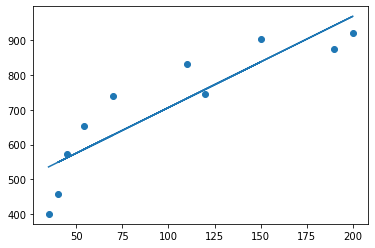

In [6]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show

In [7]:
mse = ((ks - y_hat)**2).sum()/n
print(f"{mse=}")

mse=6470.414201176658


In [8]:
zp = zp.reshape((10, 1))
ks = ks.reshape((10, 1))
# коэффициент без интерсепта:
B = np.dot(np.linalg.inv(np.dot(zp.T, zp)), zp.T@ks)
print(f"{B=}")

B=array([[5.88982042]])


In [9]:
# коэффициент с интерсептом:
zp = np.hstack([np.ones((10, 1)), zp])
B = np.dot(np.linalg.inv(np.dot(zp.T, zp)), zp.T@ks)
print(f"{B=}")   

B=array([[444.17735732],
       [  2.62053888]])


![7-2](7-2.png)

In [10]:
def mse_(B1, x, y, n):
    return np.sum((B1*x-y)**2)/n
                  
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-6
B1 = 0.1
n = len(zp)

In [11]:
for i in range(1000):
    y_hat = B1 * zp
    B1 -= alpha*(2/n)*np.sum((y_hat-ks)*zp)
    if i%100 == 0:
        mse = mse_(B1, zp, ks, n)
        print(f"{i=} {B1=} {mse=}")

i=0 B1=0.25952808 mse=493237.7212546963
i=100 B1=5.54537842245223 mse=58151.31823171113
i=200 B1=5.868748638669329 mse=56522.97550129376
i=300 B1=5.888531320728348 mse=56516.88130936019
i=400 B1=5.8897415574471985 mse=56516.85850140053
i=500 B1=5.889815595583751 mse=56516.858416040064
i=600 B1=5.889820124983314 mse=56516.85841572062
i=700 B1=5.889820402076462 mse=56516.85841571941
i=800 B1=5.88982041902807 mse=56516.8584157194
i=900 B1=5.889820420065112 mse=56516.85841571941


![7-3](7-3.png)

In [12]:
def mse_(B0, B1, x, y, n):
    return np.sum((B0+B1*x-y)**2)/n
                  
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-5
B0 = 0.1
B1 = 0.1
n = len(zp)

In [13]:
for i in range(5000000):
    y_hat = B0 + B1 * zp
    B0 -= alpha*(2/n)*np.sum((y_hat-ks))
    B1 -= alpha*(2/n)*np.sum((y_hat-ks)*zp)
    y_hat = B0 + B1 * zp
    if i%500000 == 0:
        mse = mse_(B0, B1, zp, ks, n)
        print(f"{i=} {B0=} {B1=} {mse=}")

i=0 B0=0.1139932 B1=1.6950780000000003 mse=298805.38996099564
i=500000 B0=409.0359675710964 B1=2.8791950478876815 mse=6783.669380682817
i=1000000 B0=441.396215664944 B1=2.6410093146294247 mse=6472.376235570253
i=1500000 B0=443.95725365219454 B1=2.6221589427433236 mse=6470.4264901321585
i=2000000 B0=444.15993799359467 B1=2.6206670963787237 mse=6470.414278146983
i=2500000 B0=444.1759787327175 B1=2.6205490294467615 mse=6470.414201658753
i=3000000 B0=444.17724822057306 B1=2.6205396854548715 mse=6470.414201179678
i=3500000 B0=444.1773486897232 B1=2.6205389459575072 mse=6470.414201176679
i=4000000 B0=444.1773566409863 B1=2.6205388874326947 mse=6470.41420117666
i=4500000 B0=444.1773572701258 B1=2.62053888280195 mse=6470.414201176662
